In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import reuters

In [36]:
(full_train_data, full_train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
print(full_train_labels.shape)
print(test_labels.shape)
print(full_train_data[0])
print(test_labels)
print(np.unique(test_labels))

(8982,)
(2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[ 3 10  1 ...  3  3 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [14]:
reverse_dictionary = reuters.get_word_index()
dictionary = dict([(i, j) for (j, i) in reverse_dictionary.items()])
print(list(dictionary.items())[:10])

[(10996, 'mdbl'), (16260, 'fawc'), (12089, 'degussa'), (8803, 'woods'), (13796, 'hanging'), (20672, 'localized'), (20673, 'sation'), (20675, 'chanthaburi'), (10997, 'refunding'), (8804, 'hermann')]


In [19]:
for ind in full_train_data[0]:
    print(dictionary[ind], end = ' ')

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs 

In [27]:
X_train_full, X_test = np.zeros((len(full_train_data), 10_000)), np.zeros((len(test_data), 10_000))

for i in range(len(full_train_data)):
    for j in full_train_data[i]:
        X_train_full[i, j] = 1
        
for i in range(len(test_data)):
    for j in test_data[i]:
        X_test[i, j] = 1
        
y_train_full, y_test = full_train_labels, test_labels

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.1, random_state = 0)


In [41]:
def train_model(no_of_layers = 2, no_hidden_units = 92, activation = 'relu', loss = 'sparse_categorical_crossentropy', verbose = 0):
    
    model = models.Sequential()
    
    model.add(layers.Input(shape = (10_000,)))

    for i in range(no_of_layers):
        model.add(layers.Dense(no_hidden_units, activation = activation))
    
    model.add(layers.Dense(46, activation = 'softmax'))

    model.compile(loss = loss,
                  optimizer = 'adam',
                  metrics = ['accuracy'])

    history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid),
              batch_size = 128, epochs = 10, verbose = verbose)
    
    return model, history
    
def plot_history(history, title):
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))

    ax[0].plot(history.history['loss'], label = 'training loss')
    ax[0].plot(history.history['val_loss'], label = 'validation loss')
#     ax[0].set_ylim([0, 0.6])
    ax[0].grid(); ax[0].legend()
    ax[0].set_title(title)

    ax[1].plot(history.history['accuracy'], label = 'training accuracy')
    ax[1].plot(history.history['val_accuracy'], label = 'validation accuracy')
#     ax[1].set_ylim([0.75, 1.0])
    ax[1].grid(); ax[1].legend()
    ax[1].set_title(title)

    plt.show()

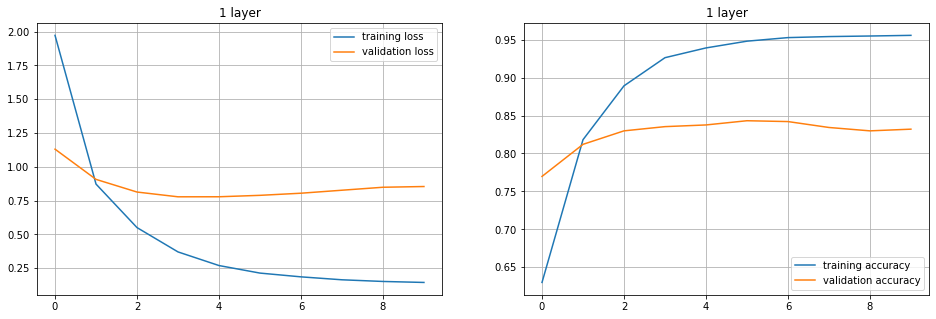

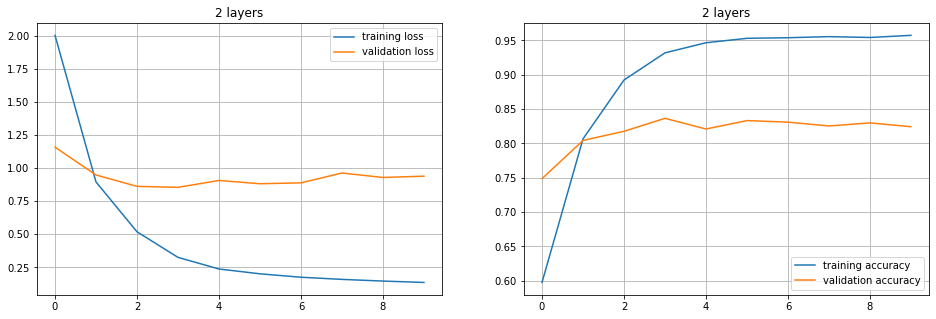

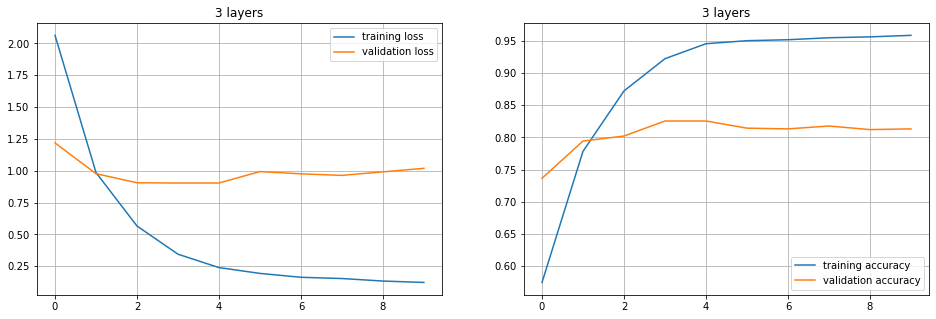

In [38]:
plot_history(train_model(no_of_layers = 1)[1], '1 layer')
plot_history(train_model(no_of_layers = 2)[1], '2 layers')
plot_history(train_model(no_of_layers = 3)[1], '3 layers')

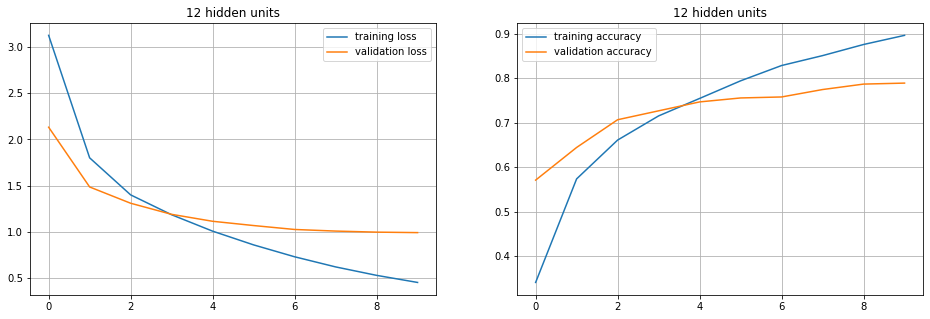

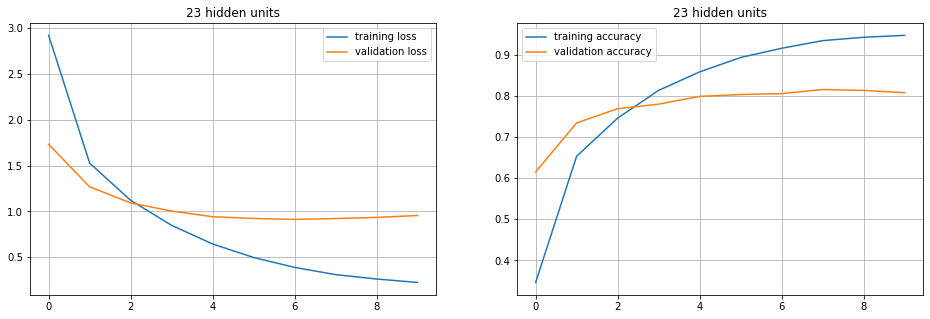

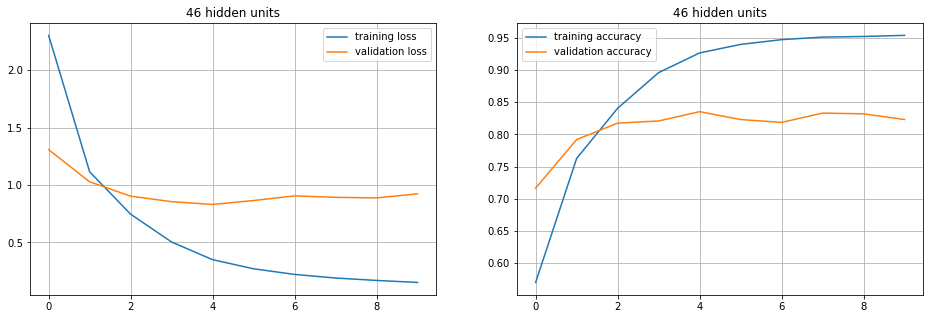

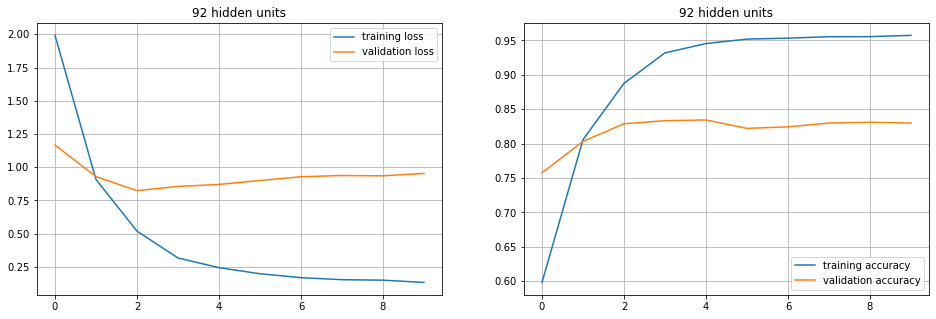

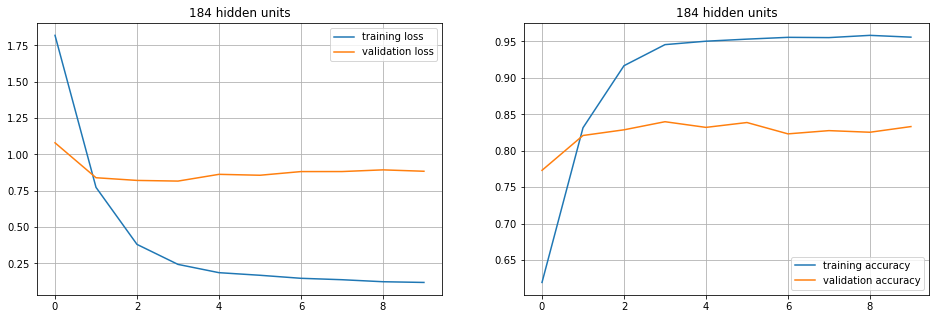

In [60]:
plot_history(train_model(no_hidden_units = 12)[1], '12 hidden units')
plot_history(train_model(no_hidden_units = 23)[1], '23 hidden units')
plot_history(train_model(no_hidden_units = 46)[1], '46 hidden units')
plot_history(train_model(no_hidden_units = 92)[1], '92 hidden units')
plot_history(train_model(no_hidden_units = 184)[1], '184 hidden units')

In [45]:
model, history = train_model(verbose = True)

Epoch 1/10
64/64 [==============================] - 0s 7ms/step - loss: 2.0702 - accuracy: 0.5925 - val_loss: 1.1558 - val_accuracy: 0.7430
Epoch 2/10
64/64 [==============================] - 0s 4ms/step - loss: 0.9366 - accuracy: 0.7935 - val_loss: 0.9078 - val_accuracy: 0.8020
Epoch 3/10
64/64 [==============================] - 0s 5ms/step - loss: 0.5494 - accuracy: 0.8858 - val_loss: 0.8354 - val_accuracy: 0.8176
Epoch 4/10
64/64 [==============================] - 0s 5ms/step - loss: 0.3298 - accuracy: 0.9284 - val_loss: 0.8064 - val_accuracy: 0.8354
Epoch 5/10
64/64 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.9441 - val_loss: 0.8581 - val_accuracy: 0.8165
Epoch 6/10
64/64 [==============================] - 0s 5ms/step - loss: 0.1947 - accuracy: 0.9521 - val_loss: 0.8998 - val_accuracy: 0.8242
Epoch 7/10
64/64 [==============================] - 0s 5ms/step - loss: 0.1723 - accuracy: 0.9534 - val_loss: 0.9096 - val_accuracy: 0.8231
Epoch 8/10
64/64 [==

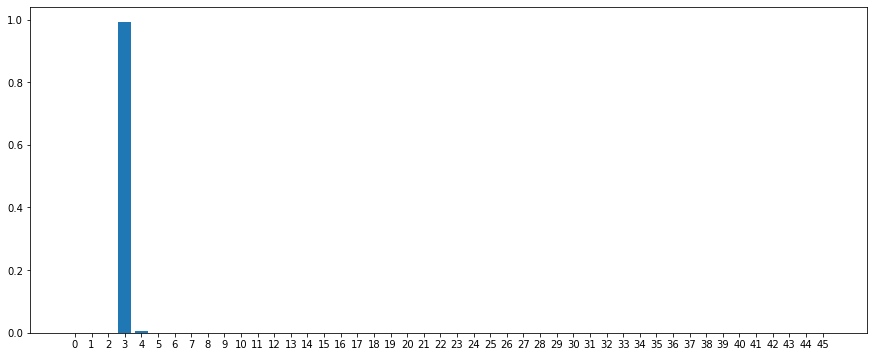

In [59]:
plt.figure(figsize = (15, 6))
plt.bar(np.arange(46), model.predict(X_train[:1])[0])
plt.xticks(np.arange(46))
plt.show()